## AIM OF THE ANALYSIS
The aim of this analysis is to diagnose the patients into two classes: Benign (1) and Malignant (2) as our results

In [1]:
## Importing Important Librabries
import numpy as np ## Library Used for Numerical Computations
import pandas as pd ## Used in reading csv files

In [2]:
import random 
import math
import seaborn as sns #Used for Graphical Plots and giving insights
import plotly
import matplotlib.pyplot as plt

In [3]:
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)

In [4]:
data=df=pd.read_csv("./datasets.csv")

In [5]:
data.tail(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [6]:
data.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [7]:
##Looking at the Summary Statistics ie: Measures of Central Tendancy and Dispersion
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [8]:
##Checking for Missing Data
data.isnull().sum().sum()

569

In [9]:
## The data contains 33 rows and 569 columns
data.shape

(569, 33)

In [10]:
## Checking for the information,Names of the columns with their data types.
data.info()
## It is seen that diagnosis is a categorical variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

## PARAMETERS OF THE DATA
1. ID Number 
The Unique ID allocated to each patient to diffentiate between them

2. Diagnosis (B=Benign and M=Malignant)
This is our target variable that helps in predicting whether the tumor is benign or malignant

3. Ten Real-Valued features Computed 

(a). Radius
     The mean of distances from center to points on the perimeter
     
(b). Texture
     The standard deviation of gray-scale values
     
(c). Perimeter
     
(d). Area

(e). Smoothness
     The local variation in radius lengths
     
(f). Compactness
     Perimeter^2/Area-1.0
     
(g). Concavity
     The severity of concave portions of the contour
     
(h). Fractal Dimension

(i). Concave Points

(j). Symmetry

Computation of each image computed with Mean, Standard Error and Worst Mean like field 4 is Texture mean, field 14 is Texture Standard Error Mean and Radius 24 is Worst Radius

In [11]:
## Dropping or Removing Unnecessary Columns
data.drop(columns=['Unnamed: 32', 'id'],axis=1, inplace=True)

In [12]:
## Checking for Missing Values
data.isnull().any()

diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_worst             False
fractal_di

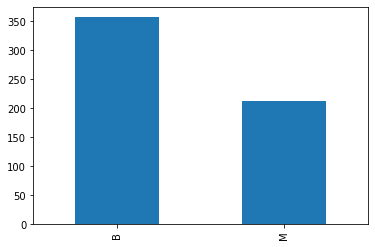

In [13]:
## Understanding the Distribution of the Target variables
data.diagnosis.value_counts().plot(kind="bar")

In [14]:
##Frequency
data.diagnosis.value_counts()
## From the Class Distribution, we can see that we have: 357 Benign Cases and 212 Malignant Cases

B    357
M    212
Name: diagnosis, dtype: int64

In [15]:
data.diagnosis

0      M
1      M
2      M
3      M
4      M
5      M
6      M
7      M
8      M
9      M
10     M
11     M
12     M
13     M
14     M
15     M
16     M
17     M
18     M
19     B
20     B
21     B
22     M
23     M
24     M
25     M
26     M
27     M
28     M
29     M
      ..
539    B
540    B
541    B
542    B
543    B
544    B
545    B
546    B
547    B
548    B
549    B
550    B
551    B
552    B
553    B
554    B
555    B
556    B
557    B
558    B
559    B
560    B
561    B
562    M
563    M
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

## VISUALIZATION OF THE DATA¶
The use of visualizing our data is to observe which features are the most helpful in predicting benign/malignant cases.

The other use is to help in model selection

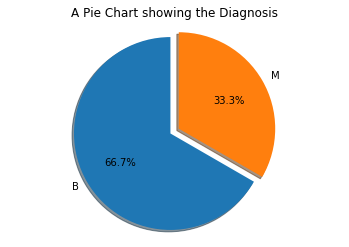

In [16]:
labels = ['B', 'M']
sizes = [30, 15]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('A Pie Chart showing the Diagnosis')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x116728490>,
      dtype=object)

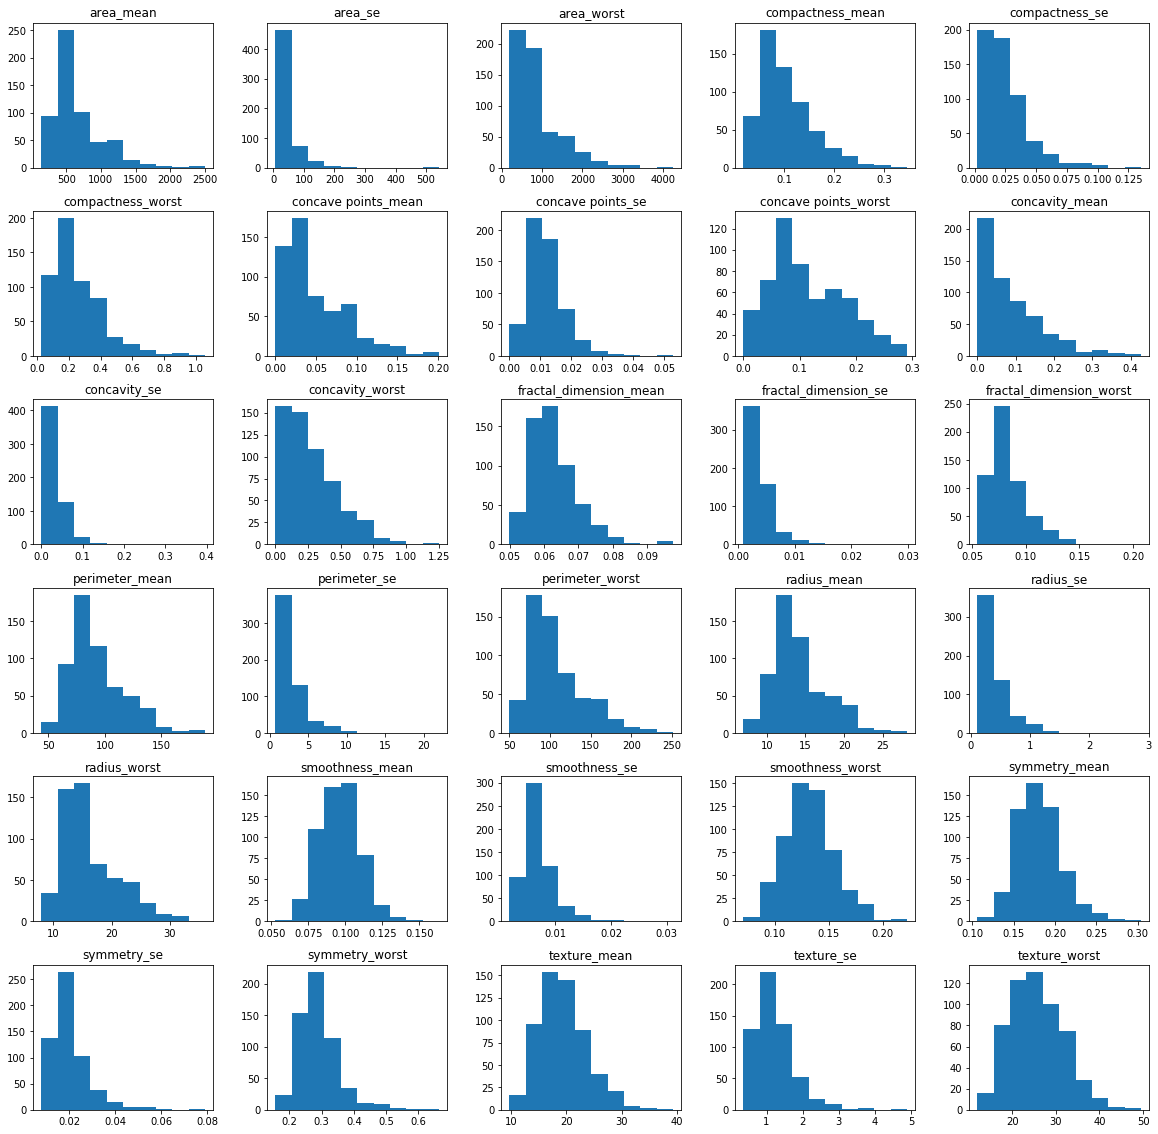

In [17]:
## Plotting Histograms
data.hist(bins=10,figsize=(20,20),grid=False)

## Interpretations

1. Most of the features are normally distributed. 

2.We do have perfectly good separtions

In [18]:
features = data[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]

y = data['diagnosis']

In [19]:
# Standardization of features
stdX = (features - features.mean()) / (features.std())              
data = pd.concat([y,stdX.iloc[:,:]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

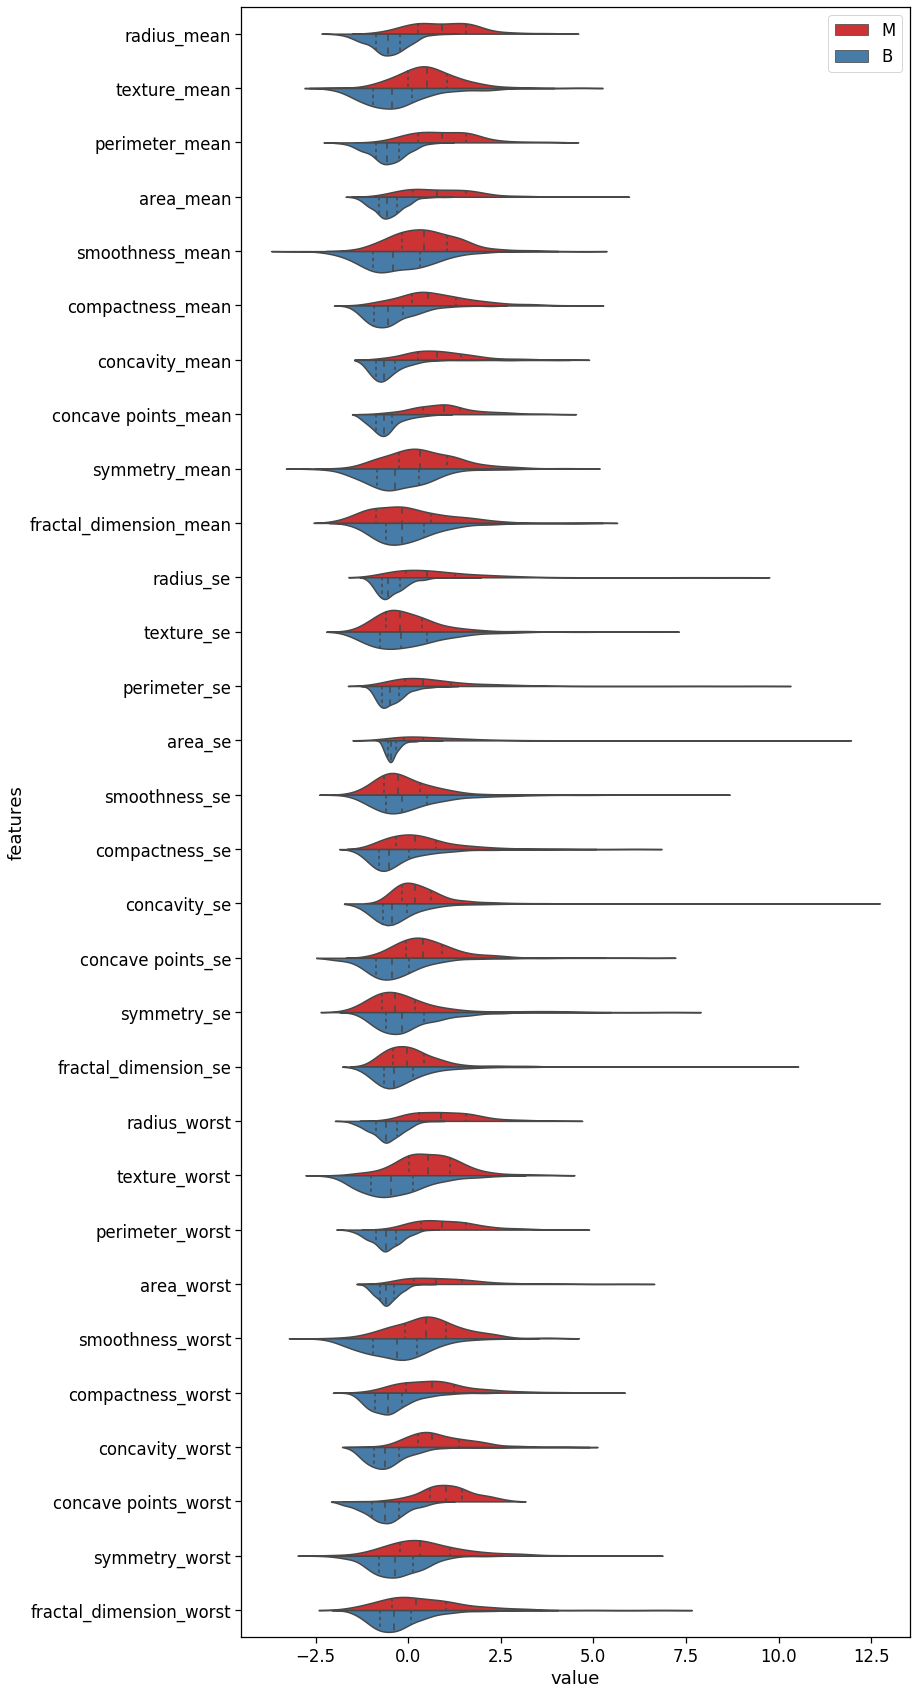

In [20]:
## Plotting Violin Plots
plt.figure(figsize=(12,30))
sns.set_context('notebook', font_scale=1.5)
sns.violinplot(x="value", y="features", hue="diagnosis", data=data,split=True, 
               inner="quart", palette='Set1')
plt.legend(loc='best');

## Interpretation

A violin plot shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared. 

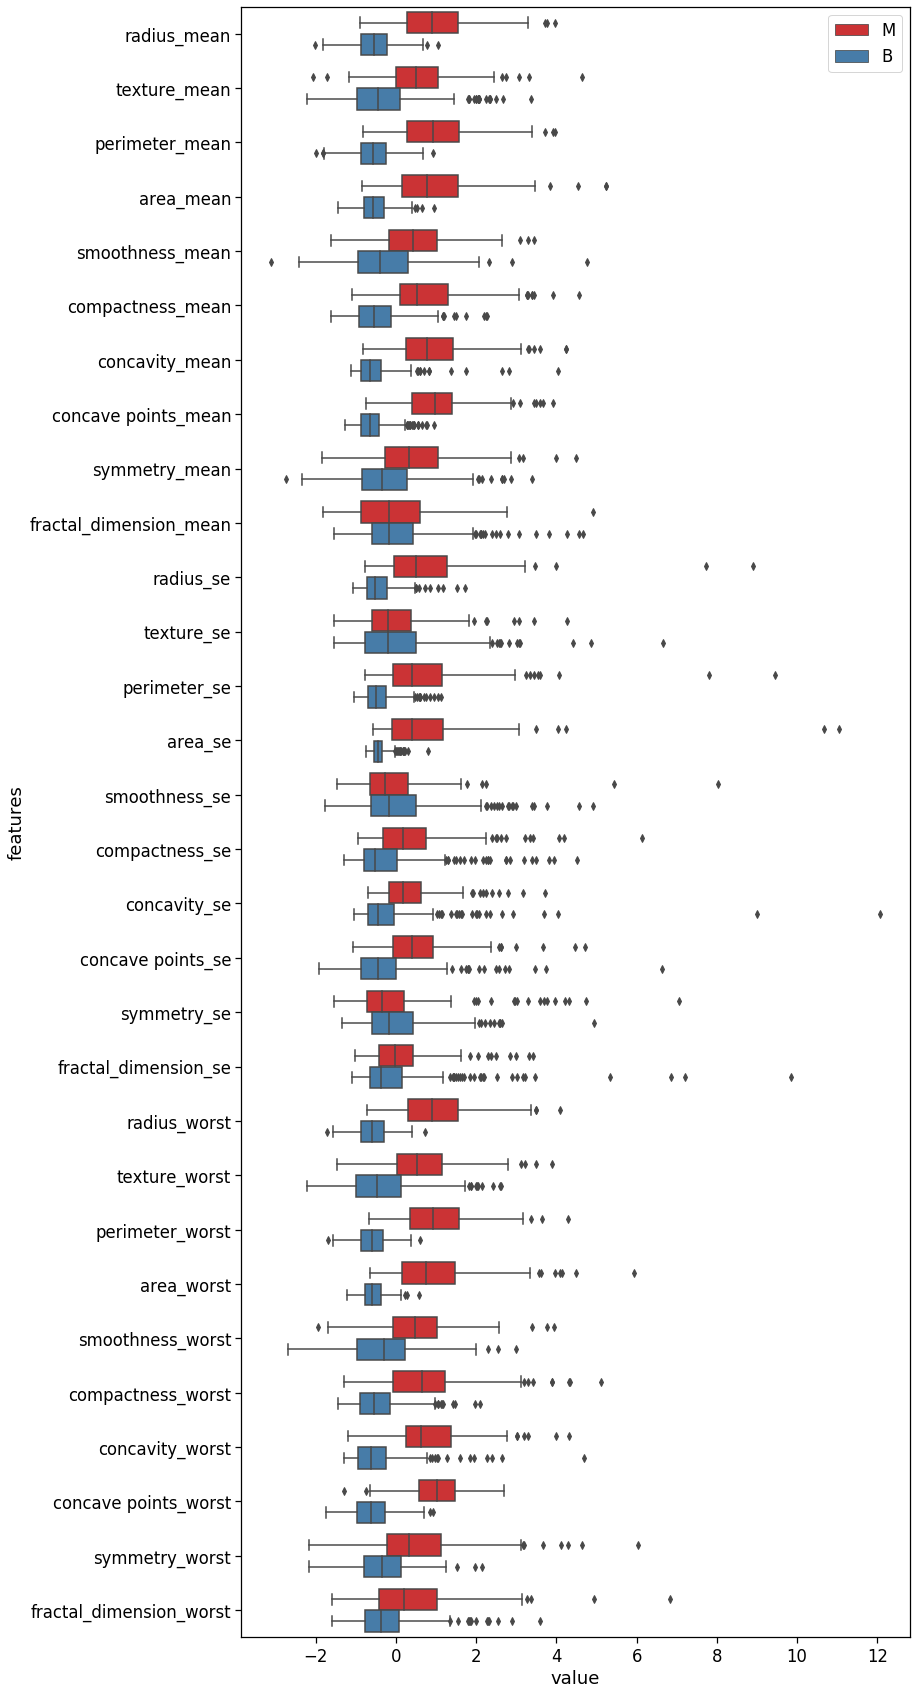

In [21]:
## Plotting BoxPlots
plt.figure(figsize=(12,30))
sns.set_context('notebook', font_scale=1.5)
sns.boxplot(x="value", y="features", hue="diagnosis", data=data, palette='Set1')
plt.legend(loc='best');
## Boxplots help in showing outliers and which of the attributes have an equal medial

/usr/local/lib/python3.7/site-packages/seaborn/categorical.py:2974: UserWarning:

The `split` parameter has been renamed to `dodge`.



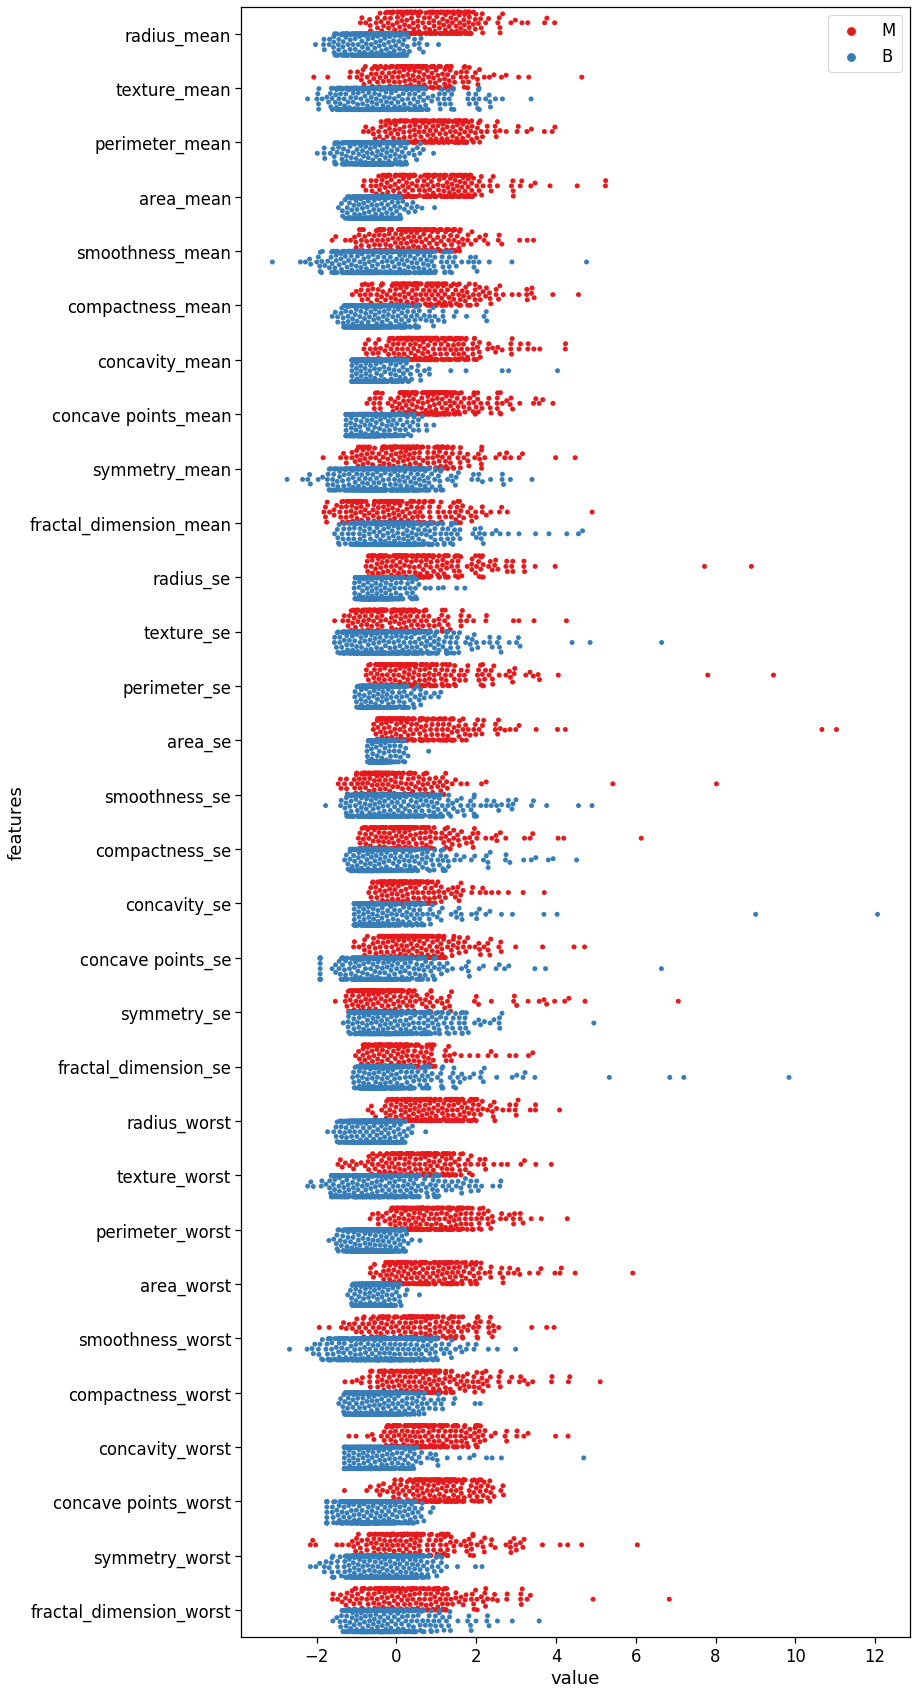

In [22]:
## Plotting Swarm Plots
plt.figure(figsize=(12,30))
sns.set_context('notebook', font_scale=1.5)
sns.swarmplot(x="value", y="features", hue="diagnosis", data=data,split=True, palette='Set1')
plt.legend(loc='best');

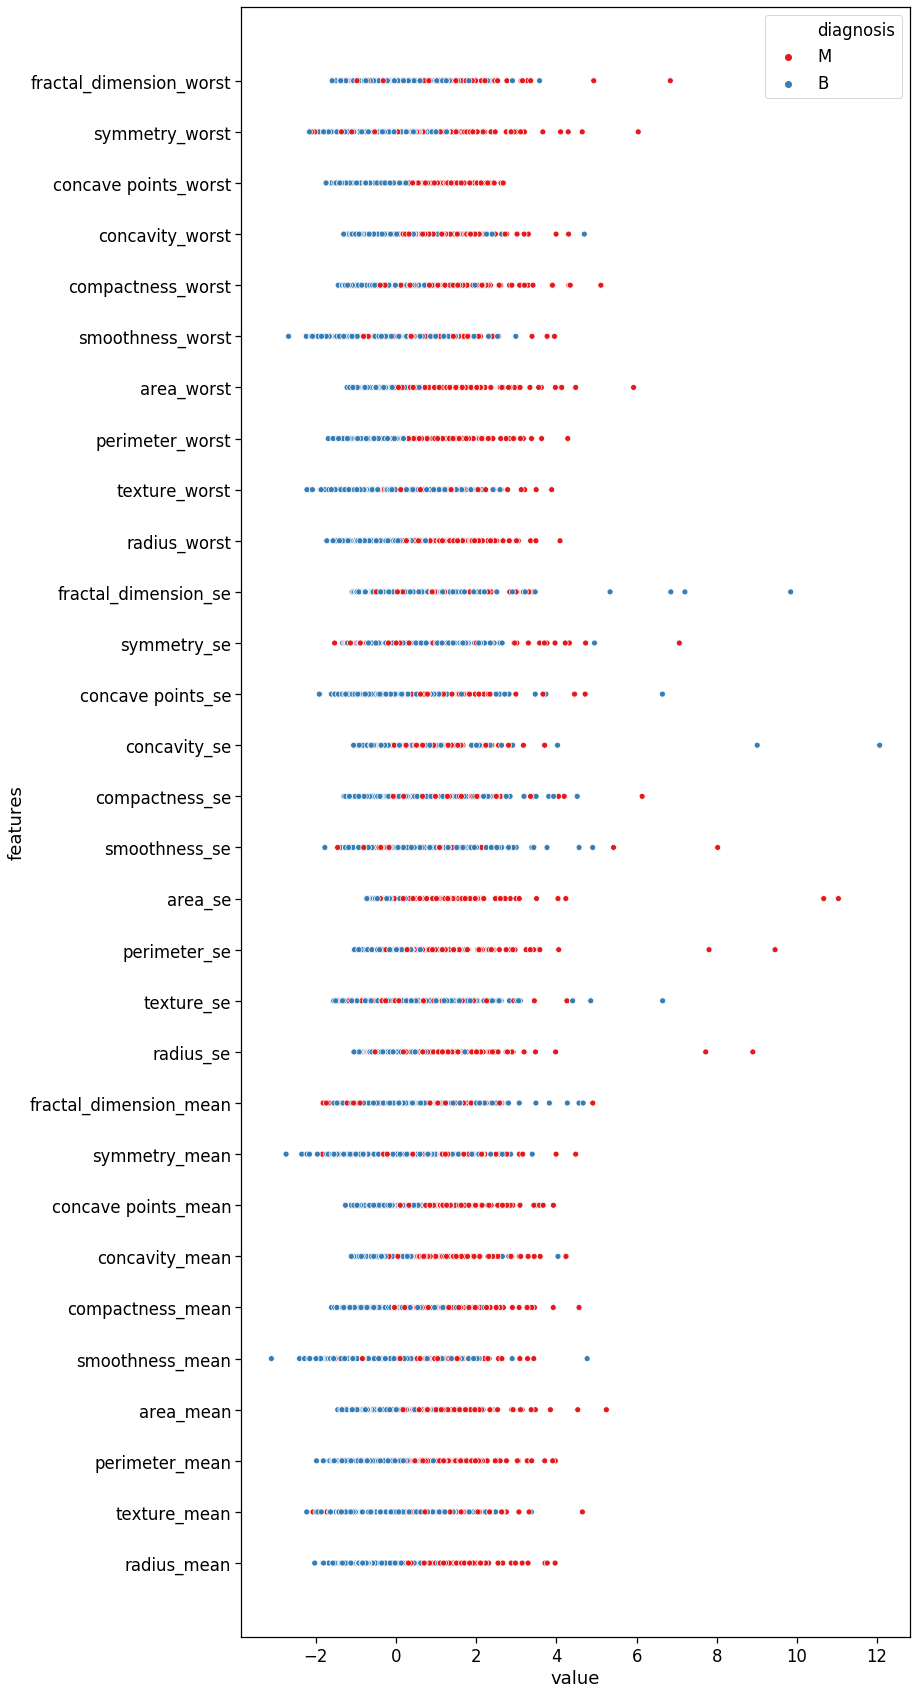

In [23]:
plt.figure(figsize=(12,30))
sns.set_context('notebook', font_scale=1.5)
sns.scatterplot(x="value", y="features", hue="diagnosis", data=data, palette='Set1')
plt.legend(loc='best');

## ASSIGNING COLUMNS TO NUMBERS 

In [24]:
cancer_mapping = {"B":1, "M":2}
data.diagnosis = data.diagnosis.map(cancer_mapping)

In [25]:
## Checking for Duplicates in the data set
data.duplicated()

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
17040    False
17041    False
17042    False
17043    False
17044    False
17045    False
17046    False
17047    False
17048    False
17049    False
17050    False
17051    False
17052    False
17053    False
17054    False
17055    False
17056    False
17057    False
17058    False
17059    False
17060    False
17061    False
17062    False
17063    False
17064    False
17065    False
17066    False
17067    False
17068    False
17069    False
Length: 17070, dtype: bool

In [26]:
data.columns

Index(['diagnosis', 'features', 'value'], dtype='object')

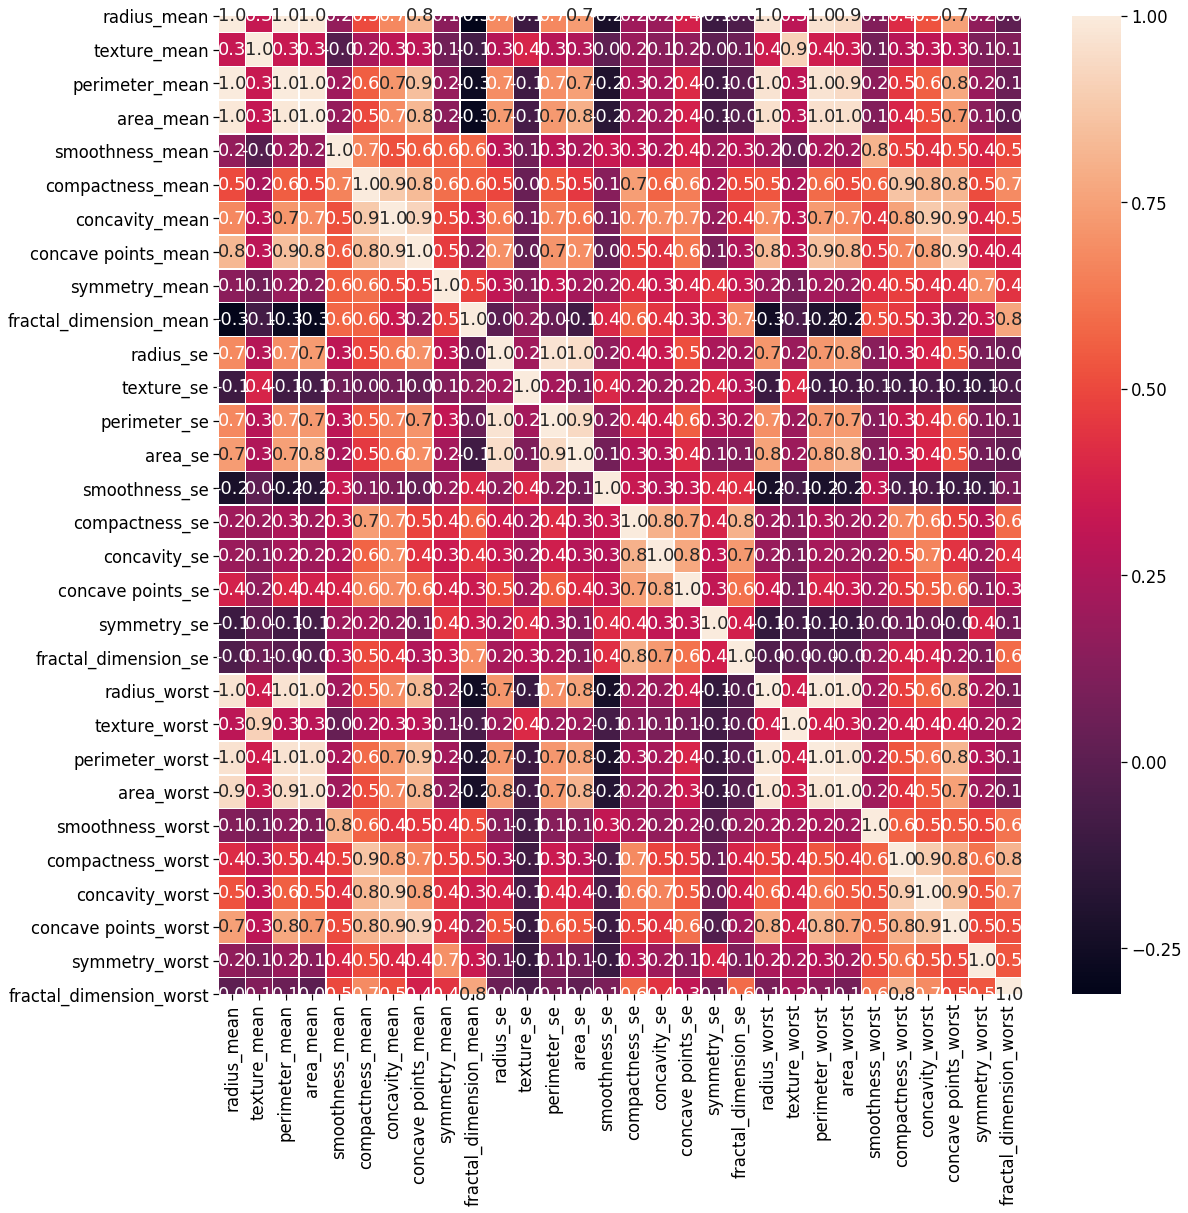

In [27]:
## Heat Map
#corr = data0.corr() # .corr is used to find corelation
f,ax = plt.subplots(figsize =(18, 18))
sns.heatmap(features.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

### Notes on the Interpretation of the Heat Map.
There are quite a few variables that are correlated. Often we have features that are highly correlated and those provide redundant information. By eliminating highly correlated features we can avoid a predictive bias for the information contained in these features. This also shows us, that when we want to make statements about the biological/ medical importance of specific features, we need to keep in mind that just because they are suitable to predicting an outcome they are not necessarily causal - they could simply be correlated with causal factors.

In [28]:
## Some of the Highly Correlated Features
high_corr_pts = features[['radius_mean', 'perimeter_mean', 'area_mean', 'radius_worst', 'perimeter_worst']]

In [29]:
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [30]:
## Splitting Data 40% test and 60% training data
features_train, features_test, y_train, y_test = train_test_split(features, y, test_size=0.4)

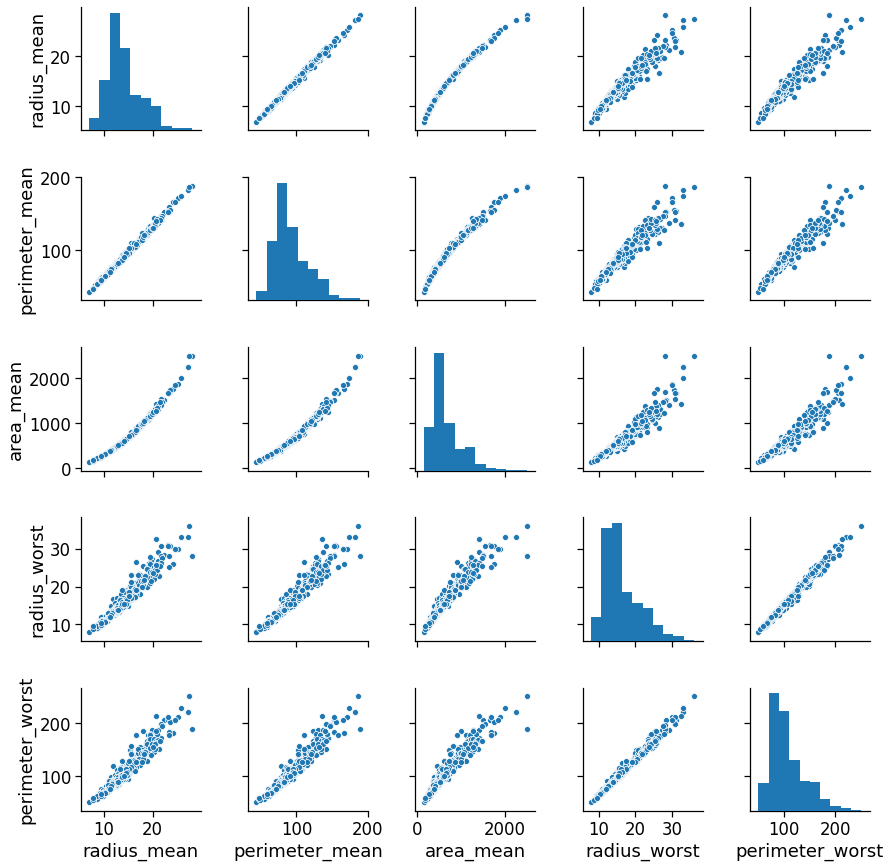

In [31]:
## Plotting Some of the Highly Correlated Points
sns.pairplot(high_corr_pts)

In [32]:
import xgboost as xgb

In [33]:
model_all = xgb.XGBClassifier()

In [34]:
## Checking Parameters of the Model
model_all.fit(features_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [35]:
pred=model_all.predict(features_test)

In [36]:
## Showing the main classification metrics
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           B       0.95      1.00      0.98       148
           M       1.00      0.91      0.95        80

    accuracy                           0.97       228
   macro avg       0.98      0.96      0.97       228
weighted avg       0.97      0.97      0.97       228



In [37]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [38]:
##Computing the best subset the set of labels predicted for a sample
## must exactly match the corresponding set of labels in y_true
print(accuracy_score(y_test, pred)) # Use of evaluation matrices

0.9692982456140351


In [39]:
##Checking the accuracy of the model
confusion_matrix(y_test, pred)

array([[148,   0],
       [  7,  73]])

In [40]:
## Finding Optimal Features
from sklearn.feature_selection import RFECV

clf = xgb.XGBClassifier()
rfecv = RFECV(estimator=clf, step=1, cv=4, scoring='accuracy') ##fold cross-validation
rfecv = rfecv.fit(features_train, y_train)

print ('Optimal number of features :', rfecv.n_features_)
print ('Best features :', features_train.columns[rfecv.support_])

Optimal number of features : 19
Best features : Index(['texture_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'area_se', 'smoothness_se', 'compactness_se',
       'concavity_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst',
       'texture_worst', 'perimeter_worst', 'smoothness_worst',
       'concavity_worst', 'concave points_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')


## Optimal Features are Selected
We now plot the number of features VS. cross-validation scores to see how it affects the prediction

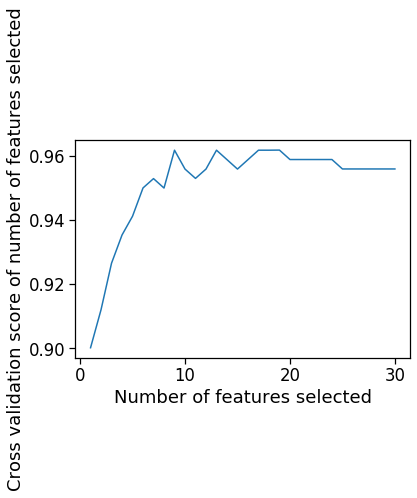

In [44]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of features selected")
plt.plot(range(1, len(rfecv.grid_scores_) +1), rfecv.grid_scores_)
plt.show()

## Interpretation

The graph shows how the score varies with varying number of features. The score is highest when the number of features is 9.

Let's rank the features by their importance


## Rank the features by their Importance

In [42]:
## Feature ranking
importances = (model_all.feature_importances_)
indices = np.argsort(importances)[::-1]
print("Feature ranking:")
for f in range(features_train.shape[1]):
    print("%d. feature %d (%f)" %(f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 22 (0.439677)
2. feature 20 (0.143044)
3. feature 27 (0.118207)
4. feature 7 (0.049728)
5. feature 1 (0.029954)
6. feature 26 (0.024147)
7. feature 16 (0.023853)
8. feature 21 (0.019078)
9. feature 6 (0.017931)
10. feature 14 (0.014663)
11. feature 13 (0.014582)
12. feature 24 (0.013211)
13. feature 29 (0.011625)
14. feature 15 (0.011373)
15. feature 18 (0.010012)
16. feature 28 (0.008041)
17. feature 4 (0.007762)
18. feature 10 (0.005793)
19. feature 19 (0.005715)
20. feature 5 (0.005390)
21. feature 17 (0.005331)
22. feature 25 (0.005104)
23. feature 9 (0.004945)
24. feature 11 (0.004668)
25. feature 0 (0.003242)
26. feature 23 (0.002922)
27. feature 3 (0.000000)
28. feature 2 (0.000000)
29. feature 12 (0.000000)
30. feature 8 (0.000000)


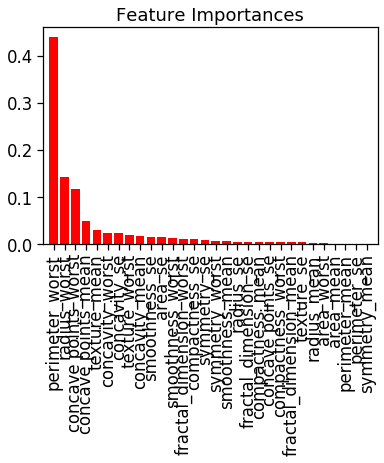

In [43]:
## Plotting Importance Features
plt.title("Feature Importances")

plt.bar(range(features_train.shape[1]), importances[indices],
       color="r", align="center")

plt.xticks(range(features_train.shape[1]), features_train.columns[indices], rotation=90)
plt.xlim([-1, features_train.shape[1]])
plt.show()
#plt.show()

## WHY THIS ALGORITHM?
1. Extreme Gradient Boost (XGBoost) is a generic framework that any differentiable loss function can be used

2. Regression trees help in spliting real values with an output that can be added.

3. There is always room for weak learners and sub models to be used instead of parameters.

4. We can reduce the residual loss.

5. Xgboost is very good with numeric values/vectors and incase of categorical values we can use One Hot Encoding.

6. Xgboost can handle heavy bundles of data

## CONCLUSION

1. We started with Importing of all necessary librabries, reading of the data into the data frame and having a snippet of how the data looks like.

2. We then Converted string data types to Integer (Hot Encoding)

2. Cheecked for Missing and Duplicated Data

3. Did some Preliminary Analysis with visualizing and having insights about the data

4. Dropped Irrelavant features to the Target Variable ('Diagnosis')

5. Assigned Colunms

6. Model Selection as Xgboost

7. 11 Optimal choosen which were highly correlated with >0.90